In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [175]:
data = pd.read_csv(r"C:\Users\erics\Documents\Programme\PWC_Kurs\archive\bank-additional-full.csv", sep = ";")
print(data.columns)
data.head()

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Look at data

In [176]:
pd.crosstab(data['y'], data['job'])

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,9070,8616,1332,954,2596,1286,1272,3646,600,6013,870,293
yes,1352,638,124,106,328,434,149,323,275,730,144,37


In [177]:
pd.crosstab(data['y'], data['education'])

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
y,,,,,,,,
no,3748,2104,5572,8484,14,4648,10498,1480
yes,428,188,473,1031,4,595,1670,251


In [178]:
pd.crosstab(data['y'], data['nr.employed'])

nr.employed,4963.6,4991.6,5008.7,5017.5,5023.5,5076.2,5099.1,5176.3,5191.0,5195.8,5228.1
y,,,,,,,,,,,
no,334,370,281,617,84,1069,7442,9,7523,3451,15368
yes,301,403,369,454,88,594,1092,1,240,232,866


In [179]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [180]:
df =pd.DataFrame()
for col in data.columns:
    df["missing_"+col] = data.loc[data[col]=="unknown"].groupby([col], as_index=False).agg({col: "count"})

In [181]:
df

,missing_age,missing_job,missing_marital,missing_education,missing_default,missing_housing,missing_loan,missing_contact,missing_month,missing_day_of_week,...,missing_campaign,missing_pdays,missing_previous,missing_poutcome,missing_emp.var.rate,missing_cons.price.idx,missing_cons.conf.idx,missing_euribor3m,missing_nr.employed,missing_y
0,NaN,330,80,1731,8597,990,990,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Training

#### make features

In [182]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [183]:
data2 = data.copy()
le = LabelEncoder()
for col in data.select_dtypes('object'):
  data2[col] = le.fit_transform(data2[col])

In [184]:
data2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [185]:
Y = data2['y']
X = data2.drop(columns='y')

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

## Training

In [14]:
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('scaler', StandardScaler()), ('classifier', RandomForestClassifier(max_depth=3))])

pipe.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(max_depth=3))])

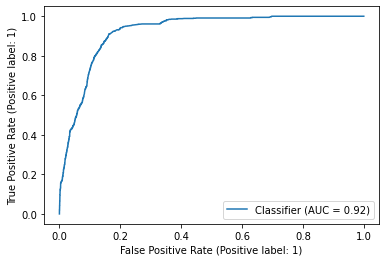

In [15]:
y_pred = pipe.predict_proba(X_test)[:,1]
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

<AxesSubplot:xlabel='threshold', ylabel='value'>

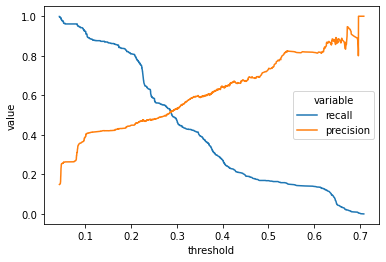

In [16]:
from sklearn.metrics import precision_recall_curve
import seaborn as sns 
precision, recall, threshold = precision_recall_curve(
    y_test, y_pred)
tst_prt = pd.DataFrame({
    "threshold": threshold,
    "recall": recall[1:],
    "precision": precision[1:]
})
tst_prt_melted = pd.melt(tst_prt, id_vars = ["threshold"],
                         value_vars = ["recall", "precision"])
sns.lineplot(x = "threshold", y = "value",
             hue = "variable", data = tst_prt_melted)

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
y_predicted = np.zeros(len(y_test))
y_predicted[y_pred >= 0.3] = 1.
print("Accuracy: %.2f%%" % (100 * accuracy_score(y_test, y_predicted)))
print("Precision: %.2f%%" % (100 * precision_score(y_test, y_predicted)))
print("Recall: %.2f%%" % (100 * recall_score(y_test, y_predicted)))

Accuracy: 89.74%
Precision: 53.32%
Recall: 47.33%


one could train several different models and look for the best one. Since this ROC curve is quite nice and the focus of the exercise does not lie on finding the optimal model I will skip this part and evaluate the model

# Evalution

Evaluate the dependence on #4 & #20

First fix #4 and make predictions with randomly changing the other features

In [17]:
print(data['education'].unique())
data2['education'].unique()

['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


array([0, 3, 1, 2, 5, 7, 6, 4])

In [18]:
data2["cons.conf.idx"].unique()

array([-36.4, -41.8, -42.7, -36.1, -40.4, -42. , -45.9, -50. , -47.1,
       -46.2, -40.8, -33.6, -31.4, -29.8, -26.9, -30.1, -33. , -34.8,
       -34.6, -40. , -39.8, -40.3, -38.3, -37.5, -49.5, -50.8])

In [19]:
import random

In [46]:
randocols = 10000
randomDF = pd.DataFrame(np.zeros((randocols, len(X.columns))), columns=X.columns)
for col in X.columns:
    inter = np.empty(randocols)
    for i in range(randocols):
        inter[i] = (random.choice(X[col].unique().tolist()))
    randomDF[col] = inter

In [47]:
randomDF

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30.0,4.0,0.0,2.0,1.0,0.0,2.0,1.0,1.0,1.0,1151.0,20.0,2.0,3.0,1.0,-3.0,93.075,-34.8,1.313,5191.0
1,22.0,1.0,3.0,1.0,0.0,0.0,2.0,1.0,1.0,0.0,328.0,18.0,5.0,4.0,1.0,-1.7,92.201,-36.1,0.729,5191.0
2,33.0,9.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,3.0,867.0,16.0,13.0,2.0,0.0,-1.1,92.469,-40.8,0.701,5195.8
3,59.0,8.0,0.0,7.0,0.0,0.0,0.0,1.0,5.0,1.0,1254.0,8.0,999.0,5.0,0.0,-1.8,94.027,-50.0,0.846,4991.6
4,67.0,5.0,0.0,7.0,0.0,2.0,0.0,0.0,0.0,4.0,1556.0,41.0,18.0,1.0,1.0,-0.2,94.199,-39.8,0.649,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,50.0,2.0,2.0,0.0,2.0,1.0,0.0,1.0,8.0,2.0,1361.0,41.0,8.0,5.0,1.0,-3.0,94.199,-41.8,1.392,5191.0
9996,43.0,4.0,3.0,6.0,2.0,2.0,2.0,1.0,2.0,3.0,1147.0,42.0,19.0,7.0,0.0,-1.8,93.749,-42.7,0.740,4991.6
9997,55.0,2.0,3.0,0.0,1.0,1.0,2.0,0.0,3.0,1.0,346.0,8.0,7.0,6.0,2.0,1.4,93.200,-42.7,0.683,5076.2
9998,88.0,3.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,4199.0,8.0,999.0,7.0,1.0,1.1,92.756,-29.8,0.843,5099.1


In [48]:
rand_pred = pipe.predict_proba(randomDF)[:,1]
randomDF['y'] = np.round(rand_pred)

In [49]:
randomDF.loc[randomDF['y'] == 1].groupby(["education"], as_index=False).agg({"y": "count"})

,education,y
0,0.0,288
1,1.0,340
2,2.0,351
3,3.0,357
4,4.0,340
5,5.0,334
6,6.0,331
7,7.0,364


In [50]:
randomDF.loc[randomDF['y'] == 1].groupby(["nr.employed"], as_index=False).agg({"y": "count"})

,nr.employed,y
0,4963.6,475
1,4991.6,454
2,5008.7,463
3,5017.5,432
4,5023.5,433
5,5076.2,395
6,5099.1,18
7,5176.3,11
8,5191.0,8
9,5195.8,9


Try the same thing with the test data. Since there might be some correlation between the features randomly shuffling them might create a problem for good predictions

In [19]:
X_test2 = X_test.copy()
X_test2['y'] = np.round(y_pred)
X_test2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
30867,34,7,1,3,0,0,0,0,6,3,...,4,999,1,0,-1.8,92.893,-46.2,1.344,5099.1,0.0
5469,38,9,1,5,0,2,2,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0.0
446,42,9,1,5,0,0,0,1,6,3,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0.0
14529,43,7,2,3,0,0,0,0,3,3,...,4,999,0,1,1.4,93.918,-42.7,4.961,5228.1,0.0
26144,29,7,1,1,0,0,0,0,7,4,...,2,999,1,0,-0.1,93.200,-42.0,4.120,5195.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25366,30,7,1,3,0,2,0,0,7,3,...,1,999,0,1,-0.1,93.200,-42.0,4.153,5195.8,0.0
10513,50,0,1,3,0,0,0,1,4,3,...,1,999,0,1,1.4,94.465,-41.8,4.961,5228.1,0.0
32514,50,1,1,0,0,2,0,1,6,0,...,4,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0.0
9867,37,1,1,1,1,2,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0.0


In [20]:
X_test_true = X_test.copy()
X_test_true['y'] = np.round(y_test)
X_test_true

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
30867,34,7,1,3,0,0,0,0,6,3,...,4,999,1,0,-1.8,92.893,-46.2,1.344,5099.1,0
5469,38,9,1,5,0,2,2,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
446,42,9,1,5,0,0,0,1,6,3,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1
14529,43,7,2,3,0,0,0,0,3,3,...,4,999,0,1,1.4,93.918,-42.7,4.961,5228.1,1
26144,29,7,1,1,0,0,0,0,7,4,...,2,999,1,0,-0.1,93.200,-42.0,4.120,5195.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25366,30,7,1,3,0,2,0,0,7,3,...,1,999,0,1,-0.1,93.200,-42.0,4.153,5195.8,0
10513,50,0,1,3,0,0,0,1,4,3,...,1,999,0,1,1.4,94.465,-41.8,4.961,5228.1,0
32514,50,1,1,0,0,2,0,1,6,0,...,4,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
9867,37,1,1,1,1,2,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0


In [21]:
X_test2.loc[X_test2['y'] == 1].groupby(["education"], as_index=False).agg({"y": "count"})

,education,y
0,0,15
1,1,4
2,2,10
3,3,48
4,5,22
5,6,78
6,7,16


In [22]:
X_test2.loc[X_test2['y'] == 1].groupby(["nr.employed"], as_index=False).agg({"y": "count"})

,nr.employed,y
0,4963.6,40
1,4991.6,54
2,5008.7,30
3,5017.5,37
4,5023.5,11
5,5076.2,21


Get the wheights from the classifier

In [68]:
importances = pipe['classifier'].feature_importances_
std = np.std([tree.feature_importances_ for tree in pipe['classifier'].estimators_], axis=0)

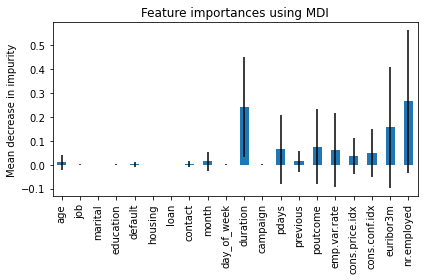

In [57]:
import pandas as pd

forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

compute feature importance based on permutation of test set. This can be more meaningful

In [64]:
from sklearn.inspection import permutation_importance
result = permutation_importance(pipe, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

forest_importances = pd.Series(result.importances_mean, index=X.columns)

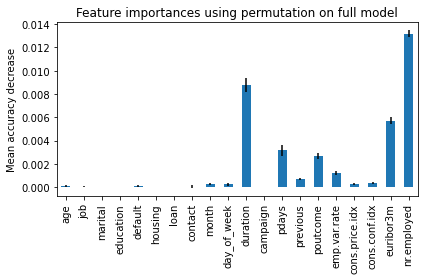

In [66]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

We can clearly see that feature 20 is the most important feature. Where feature 4 (education) seems to have no influence on the model. But we should keep in mind that this does not need to reflect the real world
but more it does only represent how the dataset was distributed. 

It makes sense that the call duration is also a very important factor in evluating how efffective the call was.

In [ ]:
TODO: # check wrongly classified as a list and look if there is a correlation between some feature and wrong classification. Compare to feature importance

In [27]:
df_test_wrong = X_test2.loc[X_test2['y']!= X_test_true['y']]
df_test_wrong

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
446,42,9,1,5,0,0,0,1,6,3,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0.0
14529,43,7,2,3,0,0,0,0,3,3,...,4,999,0,1,1.4,93.918,-42.7,4.961,5228.1,0.0
21912,30,0,1,6,0,0,0,1,1,4,...,3,999,0,1,1.4,93.444,-36.1,4.964,5228.1,0.0
36182,32,7,1,3,0,2,0,1,6,4,...,2,999,0,1,-1.8,92.893,-46.2,1.270,5099.1,0.0
20715,44,0,1,6,1,2,0,0,1,4,...,2,999,0,1,1.4,93.444,-36.1,4.965,5228.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20742,46,0,1,3,0,0,2,0,1,4,...,2,999,0,1,1.4,93.444,-36.1,4.965,5228.1,0.0
29068,27,0,2,6,0,2,0,0,0,0,...,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0.0
28805,50,1,1,2,0,2,0,0,0,2,...,2,999,1,0,-1.8,93.075,-47.1,1.410,5099.1,0.0
4110,38,7,1,3,0,2,0,1,6,1,...,3,999,0,1,1.1,93.994,-36.4,4.858,5191.0,0.0


In [28]:
TODO: #count for each feature how many time one feature comes up. This should be normalised by the number of total occurences in X_test2

SyntaxError: invalid syntax (<ipython-input-28-c532690e51fb>, line 1)

In [31]:
df_test_wrong.groupby('education').sum()['y']

education
0     5.0
1     0.0
2     4.0
3     8.0
4     0.0
5     6.0
6    23.0
7     4.0
Name: y, dtype: float64

In [32]:
df_test_wrong.groupby('nr.employed').sum()['y']

nr.employed
4963.6     9.0
4991.6    11.0
5008.7    11.0
5017.5    11.0
5023.5     5.0
5076.2     3.0
5099.1     0.0
5191.0     0.0
5195.8     0.0
5228.1     0.0
Name: y, dtype: float64

Percent of wrongly classified per class

education
0    0.006321
1    0.000000
2    0.003472
3    0.004113
4    0.000000
5    0.005687
6    0.009297
7    0.011799
Name: y, dtype: float64


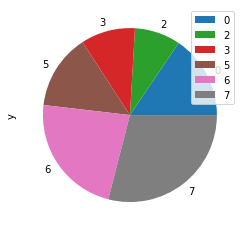

In [47]:
wrong_percent_education = df_test_wrong.groupby('education').sum()['y'] / X_test2.groupby('education').count()['y']
wrong_percent_education.plot.pie()
plt.legend()
print(wrong_percent_education)

Most wrongly classified are with education 6&7; One could also look at the variance here but the percentage seems a bit better in classification

nr.employed
4963.6    0.082569
4991.6    0.072368
5008.7    0.080882
5017.5    0.056122
5023.5    0.185185
5076.2    0.009677
5099.1    0.000000
5176.3         NaN
5191.0    0.000000
5195.8    0.000000
5228.1    0.000000
Name: y, dtype: float64


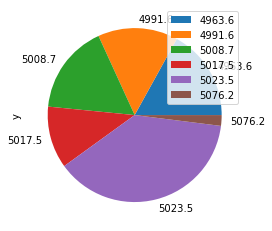

In [48]:
wrong_percent_education = df_test_wrong.groupby('nr.employed').sum()['y'] / X_test2.groupby('nr.employed').count()['y']
wrong_percent_education.plot.pie()
plt.legend()
print(wrong_percent_education)

Here one should definetely pay attention the the 5023.5 part. It has by a margin the worst percentage

Lets use the mentioned SHAP & Lime libraries


In [132]:
import shap
from sklearn.linear_model import LogisticRegression
clf = RandomForestClassifier(max_depth=3)
clf.fit(pipe[0].fit_transform(X_train), y_train)

RandomForestClassifier(max_depth=3)

In [153]:
explainer = shap.Explainer(pipe['classifier'], X_train, feature_names = np.array(X_train.columns))
# explainer = shap.TreeExplainer(clf, X_train, feature_names = np.array(X_train.columns))
shap_values = explainer.shap_values(pipe[0].fit_transform(X_test))
shap_values_np = np.array(shap_values)

 98%|===================| 16107/16476 [00:24<00:00]        

In [154]:
print(shap_values_np.shape)

(2, 8238, 20)


In [155]:
x_np = np.array(X_test[:500])
print(x_np.shape)

(500, 20)


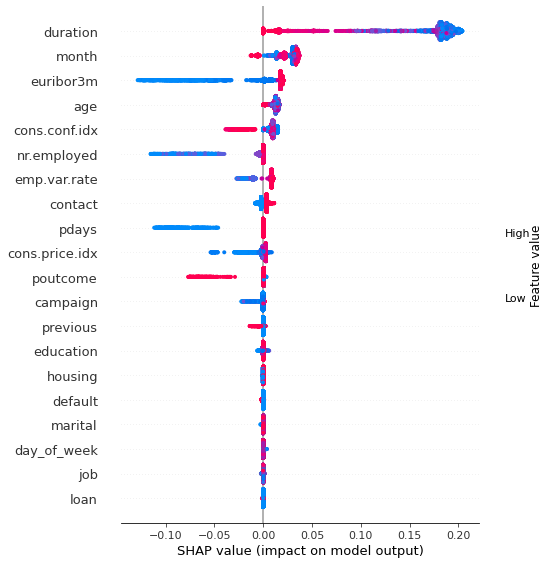

In [156]:
shap.summary_plot(shap_values[0],X_test) #predicted true

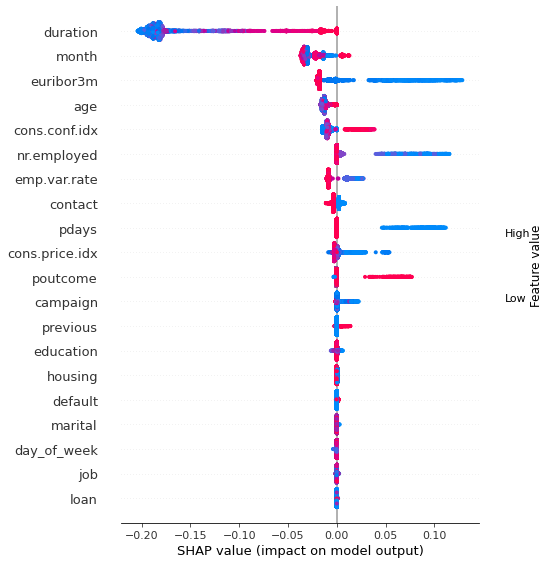

In [157]:
shap.summary_plot(shap_values[1],X_test) #predicted true

In [202]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=[ 'declined', 'accepted'],
    mode='classification'
)


In [150]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[1], 
    predict_fn=pipe.predict_proba
)

exp.show_in_notebook(show_table=True)

X does not have valid feature names, but StandardScaler was fitted with feature names


In [195]:
y_test.value_counts()

0    7307
1     931
Name: y, dtype: int64

In [209]:
ind = np.argmax(y_test == 1)
ind

10

In [211]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[ind], 
    predict_fn=pipe.predict_proba
)

exp.show_in_notebook(show_table=True)

X does not have valid feature names, but StandardScaler was fitted with feature names
